In [20]:
%pip list | grep tensorflow

tensorflow              2.16.2
Note: you may need to restart the kernel to use updated packages.


### Cleaning the data (also seeing what im working with)
- Some statistics are also found in [data.ipynb]

In [21]:
import tensorflow as tf 
import os

In [22]:
import cv2 # For working with images
import imghdr # Determine the type of an image -> removed in 3.13

In [23]:
data_dir = 'data'

if not os.path.isdir(data_dir):
    print(f'{data_dir} is not a dir')
else:
    print(f'{data_dir} is a dir')

data is a dir


In [17]:
image_exts = ['jpg','jpeg','png']

In [18]:
os.listdir(data_dir)

['lavender',
 '.DS_Store',
 'daisy',
 'rose',
 'lily',
 'tulip',
 'poppy',
 'snowdrop',
 'dandelion',
 'sunflower']

In [19]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_path):
        continue
    
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image {image_path} is not in {image_exts}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with {image_path}')

Image data/daisy/.DS_Store is not in ['jpg', 'jpeg', 'png']
Image data/rose/.DS_Store is not in ['jpg', 'jpeg', 'png']
Image data/lily/.DS_Store is not in ['jpg', 'jpeg', 'png']
Image data/tulip/.DS_Store is not in ['jpg', 'jpeg', 'png']
Image data/poppy/.DS_Store is not in ['jpg', 'jpeg', 'png']
Image data/snowdrop/.DS_Store is not in ['jpg', 'jpeg', 'png']
Image data/dandelion/.DS_Store is not in ['jpg', 'jpeg', 'png']
Image data/sunflower/.DS_Store is not in ['jpg', 'jpeg', 'png']


In [25]:
img = cv2.imread('data/rose/10503217854_e66a804309.jpg')
img.shape

(333, 500, 3)

In [32]:
img2 = cv2.imread('data/poppy/poppy_10893096.jpeg')
img2.shape

(6589, 4912, 3)

In [27]:
from matplotlib import pyplot as plt 

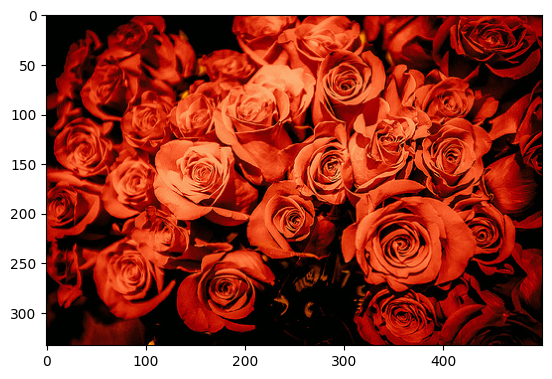

In [30]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

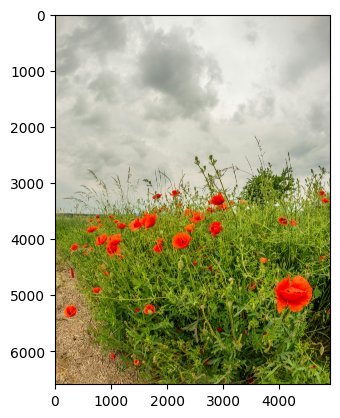

In [35]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

### Loading the data

In [36]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [37]:
import numpy as np

In [38]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 3787 files belonging to 9 classes.


In [39]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [41]:
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x13e5a2bd0>)

In [42]:
batch = data_iterator.next()
print(len(batch))

2


In [45]:
batch[0].shape

(32, 256, 256, 3)

In [46]:
batch[1]

array([6, 8, 7, 3, 8, 8, 1, 0, 8, 0, 2, 4, 1, 7, 4, 1, 8, 1, 1, 8, 7, 0,
       2, 5, 2, 2, 5, 7, 0, 6, 5, 6], dtype=int32)

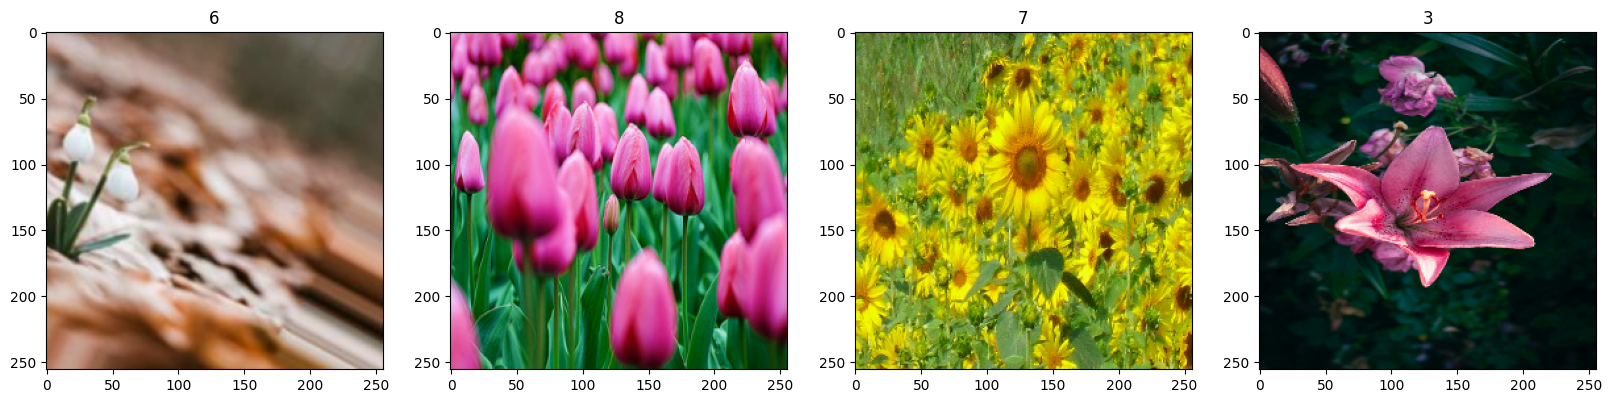

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocessing the data

- Scaling

In [48]:
scaled = batch[0] / 255

In [49]:
scaled.max()

1.0

In [50]:
data = data.map(lambda x,y: (x/255, y))

In [51]:
scaled_iterator = data.as_numpy_iterator()

In [52]:
scaled_iterator.next()[0].max()

1.0

- Splitting

In [53]:
len(data)

119

In [66]:
train_size = int(len(data)*0.7) + 12
val_size = int(len(data)*0.1) + 2
test_size = int(len(data)*0.1)

In [67]:
print(train_size) # Train = ~80%
print(val_size) # Validation = ~10-15%
print(test_size) # Test = ~10-15%

95
13
11


In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [69]:
print(len(train))
print(len(val))
print(len(test))

95
13
11
